## Focus of toyota on hybrid than EV

#### Installing required libraries

In [1]:
!pip install requests
!pip install beautifulsoup4
!pip install pandas
!pip install googlesearch-python


### Web scrapping using BeautifulSoup

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Function to get the HTML content of a webpage
def get_html_content(url):
    response = requests.get(url)
    return response.text

# Function to parse the HTML content and extract text
def parse_html(html_content):
    soup = BeautifulSoup(html_content, 'html.parser')
    paragraphs = soup.find_all('p')
    text = ' '.join([para.get_text() for para in paragraphs])
    return text

# List of article URLs to scrape
urls = [
    'https://www.cnn.com/2024/03/10/climate/hybrids-evs-toyota-climate-impact-int/index.html',
    'https://www.linkedin.com/pulse/toyotas-controversial-1690-rule-prioritizing-hybrids-over-bhardwaj-ubcfc',
    'https://www.investors.com/news/hybrid-cars-ev-electric-vehicles-ford-gm-tesla-toyota-honda/',
    'https://www.forbes.com/sites/peterlyon/2024/03/03/bucking-industry-trend-toyota-chairman-downplays-ev-growth-predictions/',

]

# Scrape and store data
data = []
for url in urls:
    html_content = get_html_content(url)
    text = parse_html(html_content)
    data.append({'url': url, 'text': text})

# Save data to a DataFrame
df = pd.DataFrame(data)
df.to_csv('scraped_articles.csv', index=False)


In [3]:
from googlesearch import search

# Function to search Google and get URLs
def google_search(query, num_results):
    return search(query, num_results=num_results, lang="en")

# Define search query and number of results
query = "why Toyota is focusing on hybrid rather than EV"
num_results = 20  # Adjust as needed

# Get search result URLs
search_urls = google_search(query, num_results)

# Scrape and store data from search results
for url in search_urls:
    try:
        html_content = get_html_content(url)
        text = parse_html(html_content)
        data.append({'url': url, 'text': text})
    except Exception as e:
        print(f"Failed to scrape {url}: {e}")

# Combine with previously scraped data
df = pd.DataFrame(data)
df.to_csv('combined_scraped_data.csv', index=False)


Failed to scrape https://www.hotcars.com/toyota-making-hybrids-instead-of-evs/: ('Connection aborted.', RemoteDisconnected('Remote end closed connection without response'))


#### Displaying first rows of the dataframe

In [4]:
df.head(30)

,url,text
0,https://www.cnn.com/2024/03/10/climate/hybrids...,\n It was just over a year ago that...
1,https://www.linkedin.com/pulse/toyotas-controv...,\n Agree & Join LinkedIn\n ...
2,https://www.investors.com/news/hybrid-cars-ev-...,\n Access to this page has been...
3,https://www.forbes.com/sites/peterlyon/2024/03...,"Former Toyota CEO, Akio Toyoda, reveals his co..."
4,https://www.nytimes.com/2024/03/09/business/to...,Please enable JS and disable any ad blocker
5,https://fortune.com/2024/02/08/toyota-hybrid-v...,Toyota was skeptical of electric vehicles back...
6,https://www.reddit.com/r/cars/comments/1ay36ed...,\n r/Cars is the largest automoti...
7,https://www.cnbc.com/2022/09/13/why-toyota-the...,Credit Cards Loans Banking Mortgages Insurance...
8,https://www.quora.com/What-factors-could-make-...,Something went wrong. Wait a moment and try ag...
9,https://www.businessinsider.com/toyota-hybrid-...,"Toyota, the originator of the hybrid-car craze..."


### Data preprocessing

####  data cleaning process for a dataset obtained through web scraping, focusing on removing unwanted text elements and standardizing the text and ready for further analysis, removing noisy or irrelevant data 

In [5]:
!pip install emoji
import pandas as pd
import re
import emoji
from bs4 import BeautifulSoup

# Load the dataset
df = pd.read_csv('combined_scraped_data.csv')

# Function to remove HTML tags
def remove_html_tags(text):
    soup = BeautifulSoup(text, 'html.parser')
    return soup.get_text()

# Function to clean the text
def clean_text(text):
    # Remove HTML tags
    text = remove_html_tags(text)
    # Remove newline characters
    text = text.replace('\n', ' ').replace('\r', ' ')
    # Remove emojis using regex
    text = emoji.replace_emoji(text, replace='')
    # Remove non-alphanumeric characters
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    # Remove extra whitespaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Apply the cleaning function to the text column
df['cleaned_text'] = df['text'].apply(clean_text)

# Remove rows with specific unwanted phrases
unwanted_phrases = [
    "Access to this page has been denied",
    "Please enable JS and disable any ad blocker",
    "404 Error",
    "Something went wrong Wait a moment and try again",
]

def contains_unwanted_phrase(text):
    return any(phrase in text for phrase in unwanted_phrases)

# Filter out rows with unwanted phrases
df = df[~df['cleaned_text'].apply(contains_unwanted_phrase)]

# Save the cleaned dataset
df.to_csv('cleaned_combined_data.csv', index=False)

print("Data cleaning complete. Cleaned data saved to 'cleaned_combined_data.csv'.")


Data cleaning complete. Cleaned data saved to 'cleaned_combined_data.csv'.


C:\Users\pinis\AppData\Local\Temp\ipykernel_2156\52024701.py:12: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, 'html.parser')


In [6]:
df.head(30)

,url,text,cleaned_text
0,https://www.cnn.com/2024/03/10/climate/hybrids...,\n It was just over a year ago that...,It was just over a year ago that Toyota appear...
1,https://www.linkedin.com/pulse/toyotas-controv...,\n Agree & Join LinkedIn\n ...,Agree Join LinkedIn By clicking Continue to jo...
3,https://www.forbes.com/sites/peterlyon/2024/03...,"Former Toyota CEO, Akio Toyoda, reveals his co...",Former Toyota CEO Akio Toyoda reveals his comp...
5,https://fortune.com/2024/02/08/toyota-hybrid-v...,Toyota was skeptical of electric vehicles back...,Toyota was skeptical of electric vehicles back...
6,https://www.reddit.com/r/cars/comments/1ay36ed...,\n r/Cars is the largest automoti...,rCars is the largest automotive enthusiast com...
7,https://www.cnbc.com/2022/09/13/why-toyota-the...,Credit Cards Loans Banking Mortgages Insurance...,Credit Cards Loans Banking Mortgages Insurance...
9,https://www.businessinsider.com/toyota-hybrid-...,"Toyota, the originator of the hybrid-car craze...",Toyota the originator of the hybridcar craze i...
12,https://www.thedrive.com/features/toyota-is-ri...,"\nBy James Gilboy\n Posted on Jul 6, 2023 1:30...",By James Gilboy Posted on Jul 6 2023 130 PM ED...
13,https://www.forbes.com/sites/peterlyon/2024/03...,"Former Toyota CEO, Akio Toyoda, reveals his co...",Former Toyota CEO Akio Toyoda reveals his comp...
14,https://intelliwings.com/blogposts/2024/06/12/...,| By Han Tran | Toyota has maintained its lea...,By Han Tran Toyota has maintained its leading ...


### Print cleaned text from datframe df

In [7]:
print(df[['cleaned_text']].head(30))

                                         cleaned_text
0   It was just over a year ago that Toyota appear...
1   Agree Join LinkedIn By clicking Continue to jo...
3   Former Toyota CEO Akio Toyoda reveals his comp...
5   Toyota was skeptical of electric vehicles back...
6   rCars is the largest automotive enthusiast com...
7   Credit Cards Loans Banking Mortgages Insurance...
9   Toyota the originator of the hybridcar craze i...
12  By James Gilboy Posted on Jul 6 2023 130 PM ED...
13  Former Toyota CEO Akio Toyoda reveals his comp...
14  By Han Tran Toyota has maintained its leading ...
16  Toyotas hybrid models have been extremely succ...
17  Beyond Zero is our vision to reach carbon neut...
18  Then 75 per monthComplete digital access to qu...
19  Click Here for 150 Global Oil Prices Click Her...
20  Our diverse electrified lineup is just the sta...
21  Plugin hybrids wont get the world to zero emis...


### Tokenization

In [8]:
from nltk.tokenize import word_tokenize

df['tokens'] = df['cleaned_text'].apply(word_tokenize)


#### Removing stopwords to eliminate common words that do not carry significant meaning and may affect the analysis.

#### Lemmatization reduces words to their base form, reducing different forms of the same word to a common base, which helps in grouping together words with similar meaning.

In [9]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(tokens):
    tokens = [word for word in tokens if word not in stop_words]
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return tokens

df['processed_tokens'] = df['tokens'].apply(preprocess_text)
df.to_csv('processed_combined_data.csv', index=False)


In [10]:
df.head(30)

,url,text,cleaned_text,tokens,processed_tokens
0,https://www.cnn.com/2024/03/10/climate/hybrids...,\n It was just over a year ago that...,It was just over a year ago that Toyota appear...,"[It, was, just, over, a, year, ago, that, Toyo...","[It, year, ago, Toyota, appeared, acknowledge,..."
1,https://www.linkedin.com/pulse/toyotas-controv...,\n Agree & Join LinkedIn\n ...,Agree Join LinkedIn By clicking Continue to jo...,"[Agree, Join, LinkedIn, By, clicking, Continue...","[Agree, Join, LinkedIn, By, clicking, Continue..."
3,https://www.forbes.com/sites/peterlyon/2024/03...,"Former Toyota CEO, Akio Toyoda, reveals his co...",Former Toyota CEO Akio Toyoda reveals his comp...,"[Former, Toyota, CEO, Akio, Toyoda, reveals, h...","[Former, Toyota, CEO, Akio, Toyoda, reveals, c..."
5,https://fortune.com/2024/02/08/toyota-hybrid-v...,Toyota was skeptical of electric vehicles back...,Toyota was skeptical of electric vehicles back...,"[Toyota, was, skeptical, of, electric, vehicle...","[Toyota, skeptical, electric, vehicle, back, w..."
6,https://www.reddit.com/r/cars/comments/1ay36ed...,\n r/Cars is the largest automoti...,rCars is the largest automotive enthusiast com...,"[rCars, is, the, largest, automotive, enthusia...","[rCars, largest, automotive, enthusiast, commu..."
7,https://www.cnbc.com/2022/09/13/why-toyota-the...,Credit Cards Loans Banking Mortgages Insurance...,Credit Cards Loans Banking Mortgages Insurance...,"[Credit, Cards, Loans, Banking, Mortgages, Ins...","[Credit, Cards, Loans, Banking, Mortgages, Ins..."
9,https://www.businessinsider.com/toyota-hybrid-...,"Toyota, the originator of the hybrid-car craze...",Toyota the originator of the hybridcar craze i...,"[Toyota, the, originator, of, the, hybridcar, ...","[Toyota, originator, hybridcar, craze, early, ..."
12,https://www.thedrive.com/features/toyota-is-ri...,"\nBy James Gilboy\n Posted on Jul 6, 2023 1:30...",By James Gilboy Posted on Jul 6 2023 130 PM ED...,"[By, James, Gilboy, Posted, on, Jul, 6, 2023, ...","[By, James, Gilboy, Posted, Jul, 6, 2023, 130,..."
13,https://www.forbes.com/sites/peterlyon/2024/03...,"Former Toyota CEO, Akio Toyoda, reveals his co...",Former Toyota CEO Akio Toyoda reveals his comp...,"[Former, Toyota, CEO, Akio, Toyoda, reveals, h...","[Former, Toyota, CEO, Akio, Toyoda, reveals, c..."
14,https://intelliwings.com/blogposts/2024/06/12/...,| By Han Tran | Toyota has maintained its lea...,By Han Tran Toyota has maintained its leading ...,"[By, Han, Tran, Toyota, has, maintained, its, ...","[By, Han, Tran, Toyota, maintained, leading, p..."


### Frequent word count

In [11]:
from collections import Counter

all_words = [word for tokens in df['processed_tokens'] for word in tokens]
word_freq = Counter(all_words)

print(word_freq.most_common(20))


[('hybrid', 158), ('vehicle', 150), ('Toyota', 129), ('EVs', 103), ('EV', 94), ('battery', 90), ('electric', 82), ('car', 80), ('The', 73), ('market', 59), ('Best', 59), ('sale', 54), ('year', 53), ('company', 52), ('emission', 50), ('Tesla', 48), ('US', 43), ('automaker', 39), ('Toyoda', 35), ('Credit', 35)]


### Calculated sentiment for text

#### This sentiment analysis step provides insights into the sentiment expressed in the text data, which can be useful for understanding opinion, feedback, or other forms of text-based sentiment.

In [12]:
from textblob import TextBlob

def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

df['sentiment'] = df['cleaned_text'].apply(get_sentiment)
df.to_csv('sentiment_combined_data.csv', index=False)


In [13]:
df.head()


,url,text,cleaned_text,tokens,processed_tokens,sentiment
0,https://www.cnn.com/2024/03/10/climate/hybrids...,\n It was just over a year ago that...,It was just over a year ago that Toyota appear...,"[It, was, just, over, a, year, ago, that, Toyo...","[It, year, ago, Toyota, appeared, acknowledge,...",0.091715
1,https://www.linkedin.com/pulse/toyotas-controv...,\n Agree & Join LinkedIn\n ...,Agree Join LinkedIn By clicking Continue to jo...,"[Agree, Join, LinkedIn, By, clicking, Continue...","[Agree, Join, LinkedIn, By, clicking, Continue...",0.139590
3,https://www.forbes.com/sites/peterlyon/2024/03...,"Former Toyota CEO, Akio Toyoda, reveals his co...",Former Toyota CEO Akio Toyoda reveals his comp...,"[Former, Toyota, CEO, Akio, Toyoda, reveals, h...","[Former, Toyota, CEO, Akio, Toyoda, reveals, c...",0.104208
5,https://fortune.com/2024/02/08/toyota-hybrid-v...,Toyota was skeptical of electric vehicles back...,Toyota was skeptical of electric vehicles back...,"[Toyota, was, skeptical, of, electric, vehicle...","[Toyota, skeptical, electric, vehicle, back, w...",0.060127
6,https://www.reddit.com/r/cars/comments/1ay36ed...,\n r/Cars is the largest automoti...,rCars is the largest automotive enthusiast com...,"[rCars, is, the, largest, automotive, enthusia...","[rCars, largest, automotive, enthusiast, commu...",0.250000


### Applied LDA model to identify topics

In [14]:
pip install pyLDAvis

Note: you may need to restart the kernel to use updated packages.


#### The code outputs the top words for each topic from both NMF and LDA models, along with the percentage contribution of each topic.

In [15]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
from gensim import corpora, models

# Ensure pyLDAvis is set up to work in Jupyter Notebooks
pyLDAvis.enable_notebook()


# Preprocess and tokenize your text data using TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(df['cleaned_text'])

print("Shape of TF-IDF Matrix:", tfidf_matrix.shape)

# Fit the NMF model
nmf = NMF(n_components=5, random_state=42)
W_matrix = nmf.fit_transform(tfidf_matrix)
H_matrix = nmf.components_

# Display topics from NMF model
feature_names = tfidf_vectorizer.get_feature_names_out()
for index, topic in enumerate(H_matrix):
    print(f"Topic 0{index + 1}:")
    print([feature_names[i] for i in topic.argsort()[-10:]])

# Calculate percentage contribution of each topic from NMF model
topic_percentage = W_matrix.sum(axis=0) / W_matrix.sum()
print("\nNMF Topic Percentage Contribution:")
print(topic_percentage)

# Transform paragraph data into document-term matrix for LDA
count_vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
doc_term_matrix = count_vectorizer.fit_transform(df['cleaned_text'])

print("\nShape of Document-Term Matrix:", doc_term_matrix.shape)

# Initialize and fit LDA model
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(doc_term_matrix)

# Display top words for each topic from LDA model
feature_names = count_vectorizer.get_feature_names_out()
for index, topic in enumerate(lda.components_):
    print(f"Topic 0{index + 1}:")
    print([feature_names[i] for i in topic.argsort()[-10:]])

# Calculate percentage contribution of each topic from LDA model
topic_percentage_lda = lda.transform(doc_term_matrix).sum(axis=0) / lda.transform(doc_term_matrix).sum()
print("\nLDA Topic Percentage Contribution:")
print(topic_percentage_lda)

# Prepare inputs for pyLDAvis
# Convert doc_term_matrix to Gensim corpus format
corpus = [list(zip(doc_term_matrix[i].nonzero()[1], doc_term_matrix[i].data)) for i in range(doc_term_matrix.shape[0])]

# Create a dictionary from the CountVectorizer feature names
id2word = corpora.Dictionary([count_vectorizer.get_feature_names_out()])

# Create a Gensim LDA model
lda_gensim = models.LdaModel(corpus=corpus, num_topics=5, id2word=id2word, passes=10)

# Visualize the topics using pyLDAvis
lda_display = gensimvis.prepare(lda_gensim, corpus, id2word, sort_topics=False)
pyLDAvis.display(lda_display)


Shape of TF-IDF Matrix: (16, 1041)
Topic 01:
['market', 'tesla', 'electric', 'cars', 'hybrid', 'ev', 'hybrids', 'vehicles', 'evs', 'toyota']
Topic 02:
['thoughts', 'matter', 'market', 'views', 'tokyo', 'sato', 'ev', 'sales', 'vehicles', 'toyoda']
Topic 03:
['impact', 'electrified', 'emissions', 'usa', 'olympic', 'battery', 'positive', 'water', 'electric', 'vehicles']
Topic 04:
['apply', 'international', 'edition', 'year', '20', 'essential', 'save', 'upfront', 'pay', 'access']
Topic 05:
['tesla', 'industry', 'automotive', 'largest', 'community', 'news', 'stories', 'projects', 'advice', 'discussion']

NMF Topic Percentage Contribution:
[0.39168311 0.18744625 0.20720202 0.09194014 0.12172849]

Shape of Document-Term Matrix: (16, 1041)
Topic 01:
['hybrids', 'vehicles', 'evs', 'toyoda', 'hybrid', 'market', 'sales', 'ev', 'tesla', 'toyota']
Topic 02:
['create', 'discussion', 'advice', 'news', 'community', 'projects', 'largest', 'automotive', 'stories', 'industry']
Topic 03:
['cars', 'emissio

### Visualizations

visualising top 20 frequent words

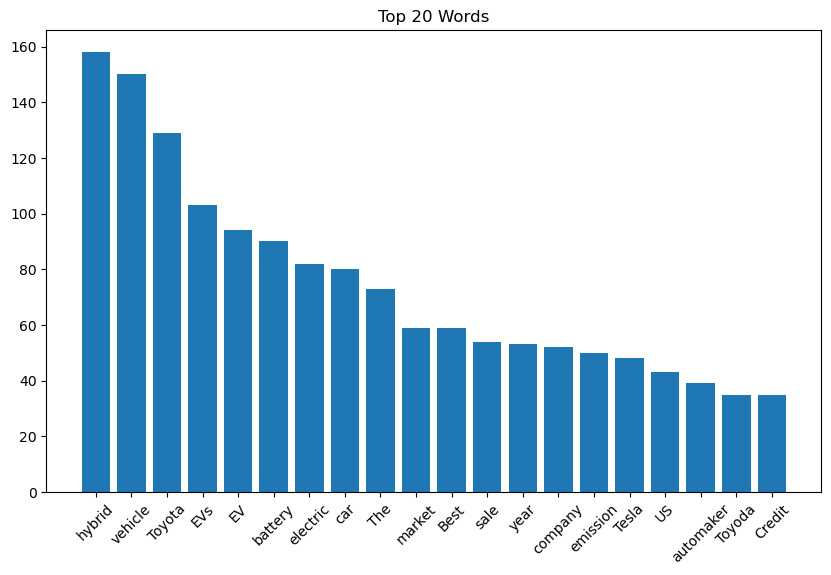

In [16]:
import matplotlib.pyplot as plt

# Bar chart for word frequency
top_words = word_freq.most_common(20)
words, counts = zip(*top_words)

plt.figure(figsize=(10, 6))
plt.bar(words, counts)
plt.title('Top 20 Words')
plt.xticks(rotation=45)
plt.show()


In [17]:
# Define keywords for each reason
market_demand_keywords = ['consumer preference', 'market demand', 'customer interest', 'sales', 'market trends', 'consumer behavior']
cost_infrastructure_keywords = ['cost', 'price', 'affordability', 'infrastructure', 'charging stations', 'maintenance', 'investment']
company_strategy_keywords = ['company strategy', 'business model', 'long-term vision', 'strategic planning', 'competitive advantage']
environmental_factors_keywords = ['environmental impact', 'emissions', 'carbon footprint', 'regulations', 'sustainability', 'government policy']

# Function to extract sentences containing specific keywords
def extract_sentences(text, keywords):
    sentences = text.split('. ')
    relevant_sentences = [sentence for sentence in sentences if any(keyword in sentence for keyword in keywords)]
    return '. '.join(relevant_sentences)

# Extract relevant sentences for each category
df['market_demand'] = df['cleaned_text'].apply(lambda text: extract_sentences(text, market_demand_keywords))
df['cost_infrastructure'] = df['cleaned_text'].apply(lambda text: extract_sentences(text, cost_infrastructure_keywords))
df['company_strategy'] = df['cleaned_text'].apply(lambda text: extract_sentences(text, company_strategy_keywords))
df['environmental_factors'] = df['cleaned_text'].apply(lambda text: extract_sentences(text, environmental_factors_keywords))


In [18]:
from collections import Counter

# Function to count keyword occurrences
def count_keywords(text, keywords):
    count = 0
    for keyword in keywords:
        count += text.lower().count(keyword)
    return count

# Count occurrences for each category
df['market_demand_count'] = df['cleaned_text'].apply(lambda text: count_keywords(text, market_demand_keywords))
df['cost_infrastructure_count'] = df['cleaned_text'].apply(lambda text: count_keywords(text, cost_infrastructure_keywords))
df['company_strategy_count'] = df['cleaned_text'].apply(lambda text: count_keywords(text, company_strategy_keywords))
df['environmental_factors_count'] = df['cleaned_text'].apply(lambda text: count_keywords(text, environmental_factors_keywords))


#### Visualizaing Frequency of Keywords for Each Reason

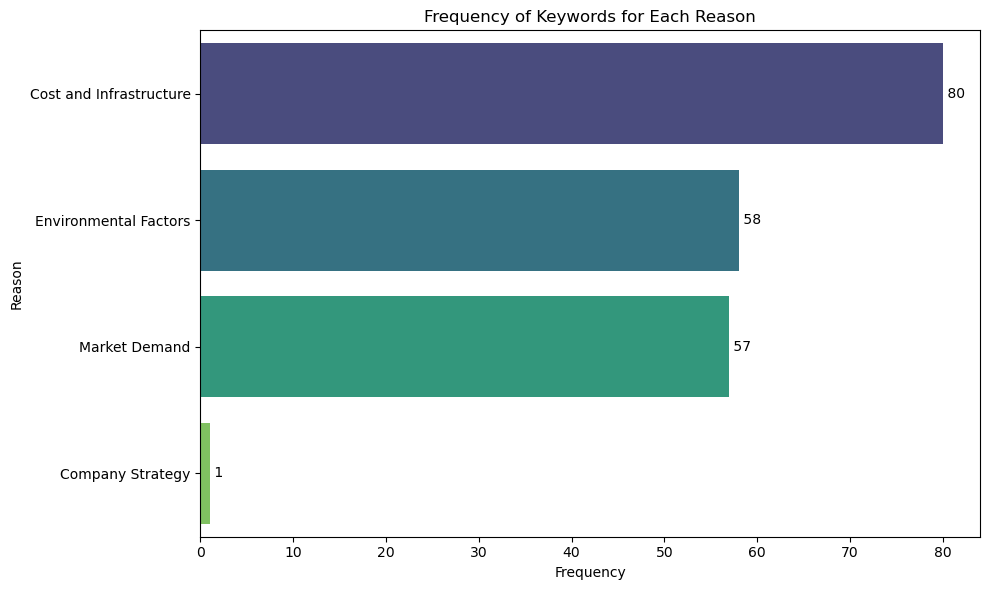

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Aggregate counts for each reason
keyword_counts = {
    'Market Demand': df['market_demand_count'].sum(),
    'Cost and Infrastructure': df['cost_infrastructure_count'].sum(),
    'Company Strategy': df['company_strategy_count'].sum(),
    'Environmental Factors': df['environmental_factors_count'].sum()
}

# Convert to DataFrame for better sorting and control
keyword_df = pd.DataFrame.from_dict(keyword_counts, orient='index', columns=['Frequency'])
keyword_df = keyword_df.sort_values(by='Frequency', ascending=False)

# Plot the keyword frequencies using a horizontal bar chart with color gradient
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='Frequency', y=keyword_df.index, data=keyword_df, palette='viridis', orient='h')

# Annotate the bars with the frequencies
for index, value in enumerate(keyword_df['Frequency']):
    barplot.text(value, index, f' {value} ', ha='left', va='center', color='black')

plt.title('Frequency of Keywords for Each Reason')
plt.xlabel('Frequency')
plt.ylabel('Reason')
plt.tight_layout()
plt.show()


#### This code provides a clear visualization of the sentiment analysis results for each reason, helping to interpret the sentiment polarity across various factors effectively.

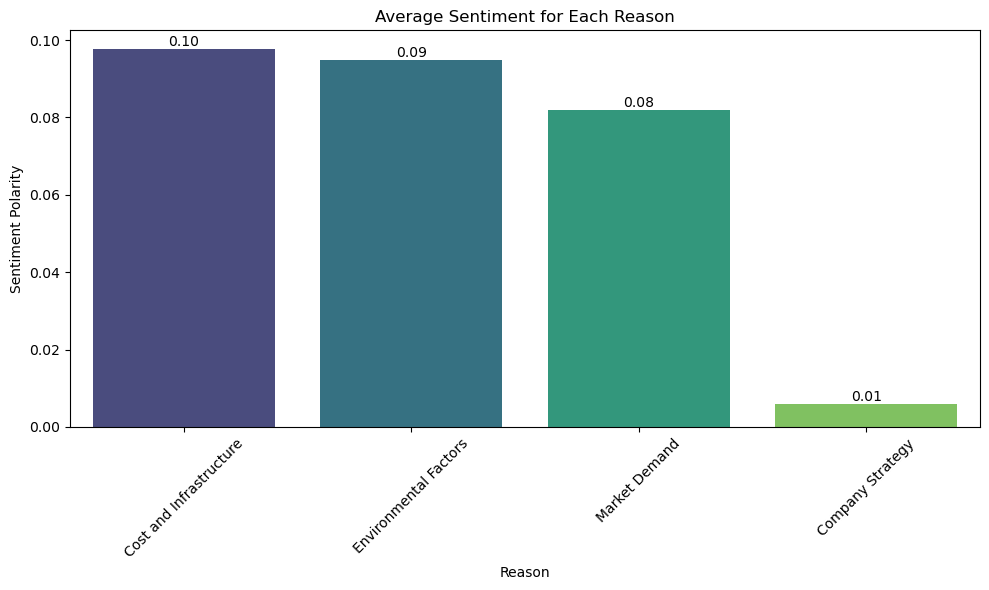

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to calculate sentiment
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Calculate sentiment for each reason
df['market_demand_sentiment'] = df['market_demand'].apply(get_sentiment)
df['cost_infrastructure_sentiment'] = df['cost_infrastructure'].apply(get_sentiment)
df['company_strategy_sentiment'] = df['company_strategy'].apply(get_sentiment)
df['environmental_factors_sentiment'] = df['environmental_factors'].apply(get_sentiment)

# Aggregate sentiment for each reason
sentiment_averages = {
    'Market Demand': df['market_demand_sentiment'].mean(),
    'Cost and Infrastructure': df['cost_infrastructure_sentiment'].mean(),
    'Company Strategy': df['company_strategy_sentiment'].mean(),
    'Environmental Factors': df['environmental_factors_sentiment'].mean()
}

# Convert to DataFrame for better sorting and control
sentiment_df = pd.DataFrame.from_dict(sentiment_averages, orient='index', columns=['Sentiment Polarity'])
sentiment_df = sentiment_df.sort_values(by='Sentiment Polarity', ascending=False)

# Plot the average sentiment using a bar plot with seaborn
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x=sentiment_df.index, y='Sentiment Polarity', data=sentiment_df, palette='viridis')

# Annotate the bars with the sentiment polarity values
for index, value in enumerate(sentiment_df['Sentiment Polarity']):
    barplot.text(index, value, f'{value:.2f}', ha='center', va='bottom', color='black')

plt.title('Average Sentiment for Each Reason')
plt.xlabel('Reason')
plt.ylabel('Sentiment Polarity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Displays a word cloud with words sized by frequency and positioned within the outline of the Toyota logo.

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pinis\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pinis\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


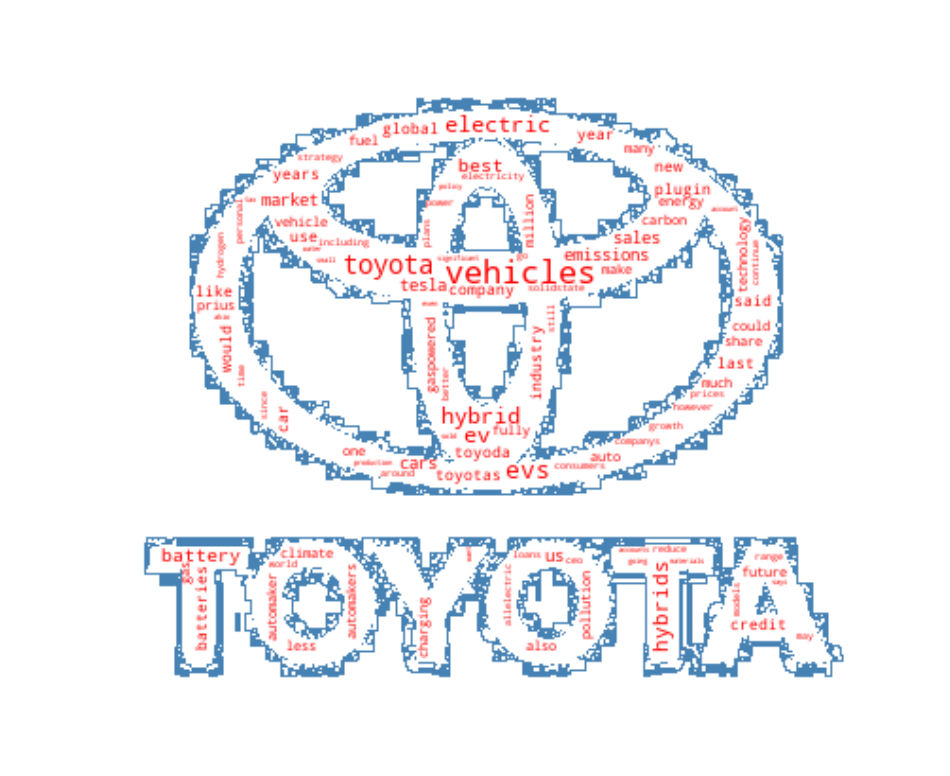

In [21]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
import numpy as np

# Ensure you have the NLTK stopwords downloaded
nltk.download('punkt')
nltk.download('stopwords')

# Function to preprocess and tokenize the text
def preprocess_and_tokenize(text):
    tokens = word_tokenize(text.lower())
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token.isalpha() and token not in stop_words]
    return tokens

# Function to generate word frequency
def generate_word_frequency(tokens):
    word_freq = Counter(tokens)
    return word_freq

# Function to generate word cloud with Toyota symbol
def generate_word_cloud(text, mask_image, max_words=100, background_color='white'):
    # Generate word frequencies
    word_freq = generate_word_frequency(text)
    
    # Create word cloud
    wordcloud = WordCloud(max_words=max_words, background_color=background_color, mask=mask_image,
                          contour_color='steelblue', contour_width=1, colormap='viridis')
    wordcloud.generate_from_frequencies(word_freq)
    
    # Create a colored image from the mask
    image_colors = ImageColorGenerator(mask_image)
    wordcloud.recolor(color_func=image_colors)
    
    # Define colors for text in the word cloud
    def color_func(*args, **kwargs):
        return "rgb(255, 0, 0)"  # Red color for the text
    
    # Plot the word cloud with custom text colors
    plt.figure(figsize=(12, 12))
    plt.imshow(wordcloud.recolor(color_func=color_func), interpolation="bilinear")
    plt.axis("off")
    plt.show()

if __name__ == "__main__":
    
    # Ensure 'cleaned_text' column exists and is a list of strings
    assert 'cleaned_text' in df.columns, "The DataFrame does not contain a 'cleaned_text' column"
    assert df['cleaned_text'].apply(lambda x: isinstance(x, str)).all(), "Not all cleaned_text entries are strings"
    
    # Combine all texts to create a single string for word cloud
    all_text = ' '.join(df['cleaned_text'])
    
    # Tokenize the combined text
    tokens = preprocess_and_tokenize(all_text)
    
    # Load Toyota logo image and convert to RGBA if needed
    toyota_logo = np.array(Image.open("C:\\Users\\pinis\\Downloads\\toyota logo.jpg").convert("RGBA"))
    
    # Generate word cloud with Toyota symbol
    generate_word_cloud(tokens, toyota_logo)


#### This code efficiently extracts and organizes sentences containing key information from a larger text corpus, facilitating deeper analysis and understanding of the data.

In [22]:
import pandas as pd
import re
import emoji
from bs4 import BeautifulSoup
from collections import Counter
import matplotlib.pyplot as plt
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from wordcloud import WordCloud
import nltk

# Define keywords for each reason
market_demand_keywords = ['consumer preference', 'market demand', 'customer interest', 'sales', 'market trends', 'consumer behavior']
cost_infrastructure_keywords = ['cost', 'price', 'affordability', 'infrastructure', 'charging stations', 'maintenance', 'investment']
company_strategy_keywords = ['company strategy', 'business model', 'long-term vision', 'strategic planning', 'competitive advantage']
environmental_factors_keywords = ['environmental impact', 'emissions', 'carbon footprint', 'regulations', 'sustainability', 'government policy']
hybrid_ev_sales_keywords = ['hybrid sales', 'EV sales', 'comparison', 'market share']
carbon_emissions_keywords = ['carbon emissions', 'emission reduction', 'sustainable practices']
mineral_usage_keywords = ['mineral usage', 'battery materials', 'rare earth elements']
regulations_keywords = ['regulations', 'government policy', 'legislation']

# Function to extract sentences containing specific keywords
def extract_sentences(text, keywords):
    sentences = text.split('. ')
    relevant_sentences = [sentence for sentence in sentences if any(keyword in sentence for keyword in keywords)]
    return '. '.join(relevant_sentences)


#### This code counts and prints the occurrences of keywords related to each reason category in the cleaned text data.

In [23]:
# Extract relevant sentences for each category
df['market_demand'] = df['cleaned_text'].apply(lambda text: extract_sentences(text, market_demand_keywords))
df['cost_infrastructure'] = df['cleaned_text'].apply(lambda text: extract_sentences(text, cost_infrastructure_keywords))
df['company_strategy'] = df['cleaned_text'].apply(lambda text: extract_sentences(text, company_strategy_keywords))
df['environmental_factors'] = df['cleaned_text'].apply(lambda text: extract_sentences(text, environmental_factors_keywords))
df['hybrid_ev_sales'] = df['cleaned_text'].apply(lambda text: extract_sentences(text, hybrid_ev_sales_keywords))
df['carbon_emissions'] = df['cleaned_text'].apply(lambda text: extract_sentences(text, carbon_emissions_keywords))
df['mineral_usage'] = df['cleaned_text'].apply(lambda text: extract_sentences(text, mineral_usage_keywords))
df['regulations'] = df['cleaned_text'].apply(lambda text: extract_sentences(text, regulations_keywords))

# Function to count keyword occurrences
def count_keywords(text, keywords):
    count = 0
    for keyword in keywords:
        count += text.lower().count(keyword)
    return count
# Count occurrences for each category
df['market_demand_count'] = df['cleaned_text'].apply(lambda text: count_keywords(text, market_demand_keywords))
df['cost_infrastructure_count'] = df['cleaned_text'].apply(lambda text: count_keywords(text, cost_infrastructure_keywords))
df['company_strategy_count'] = df['cleaned_text'].apply(lambda text: count_keywords(text, company_strategy_keywords))
df['environmental_factors_count'] = df['cleaned_text'].apply(lambda text: count_keywords(text, environmental_factors_keywords))
df['hybrid_ev_sales_count'] = df['cleaned_text'].apply(lambda text: count_keywords(text, hybrid_ev_sales_keywords))
df['carbon_emissions_count'] = df['cleaned_text'].apply(lambda text: count_keywords(text, carbon_emissions_keywords))
df['mineral_usage_count'] = df['cleaned_text'].apply(lambda text: count_keywords(text, mineral_usage_keywords))
df['regulations_count'] = df['cleaned_text'].apply(lambda text: count_keywords(text, regulations_keywords))

# Print the counts
print("Market Demand Count:")
print(df['market_demand_count'].sum())

print("Cost and Infrastructure Count:")
print(df['cost_infrastructure_count'].sum())

print("Company Strategy Count:")
print(df['company_strategy_count'].sum())

print("Environmental Factors Count:")
print(df['environmental_factors_count'].sum())

print("Hybrid and EV Sales Count:")
print(df['hybrid_ev_sales_count'].sum())

print("Carbon Emissions Count:")
print(df['carbon_emissions_count'].sum())

print("Mineral Usage Count:")
print(df['mineral_usage_count'].sum())

print("Regulations Count:")
print(df['regulations_count'].sum())


Market Demand Count:
57
Cost and Infrastructure Count:
80
Company Strategy Count:
1
Environmental Factors Count:
58
Hybrid and EV Sales Count:
19
Carbon Emissions Count:
10
Mineral Usage Count:
2
Regulations Count:
8


#### Calculates sentiment polarity and classifies it into categories (Positive, Negative, Neutral) for different reasons and Plots the distribution of sentiment classes using Seaborn, providing insights into the sentiment distribution across different reasons or topics.

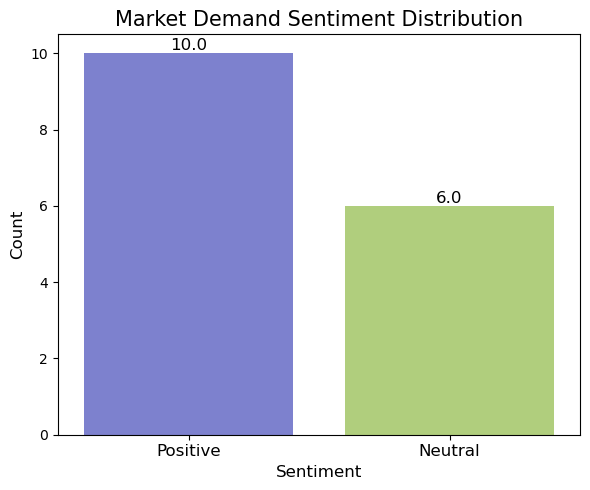

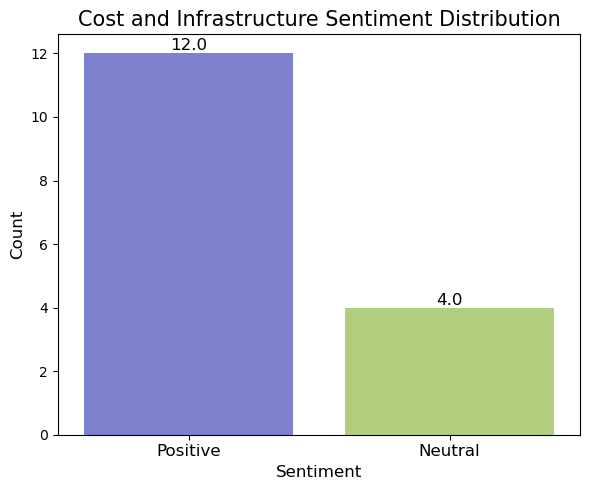

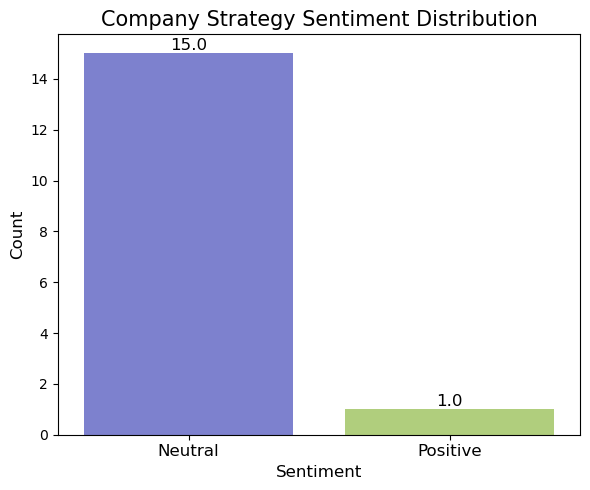

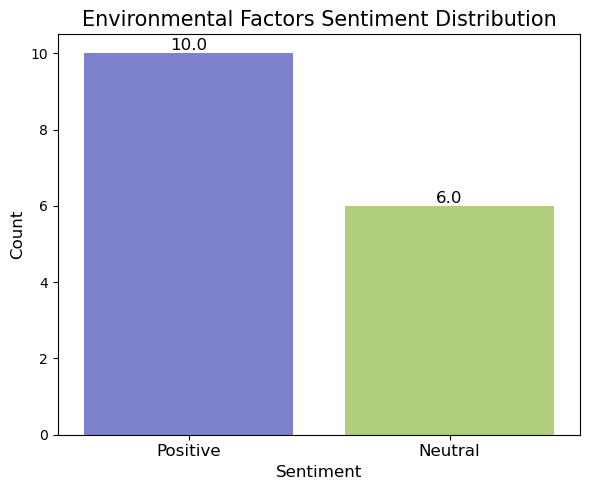

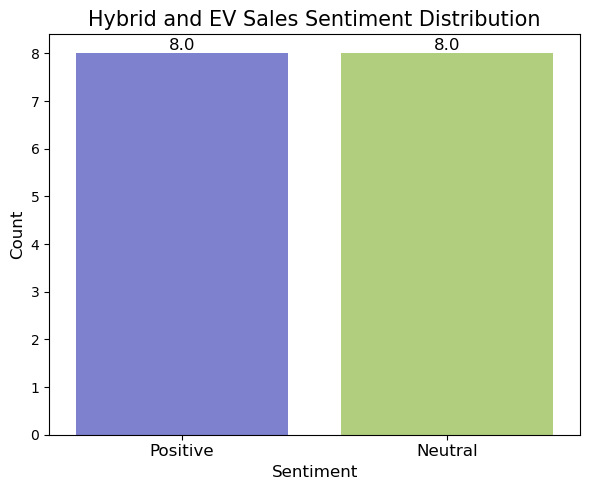

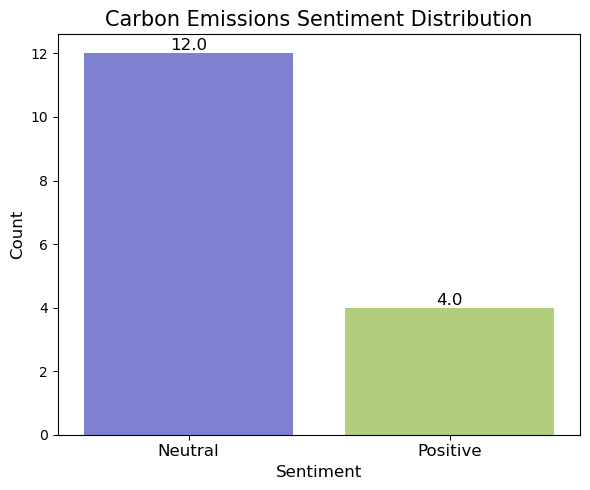

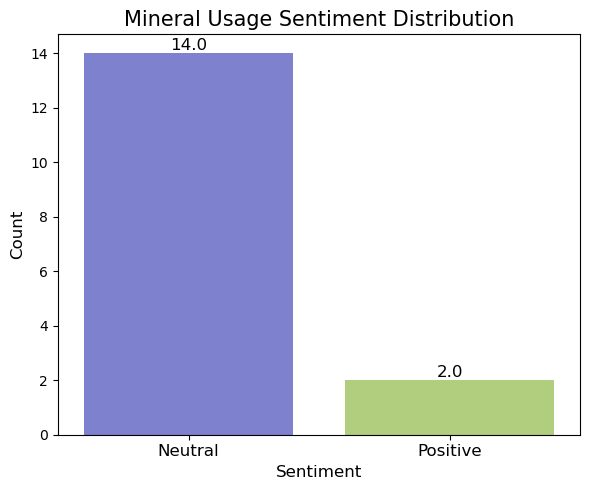

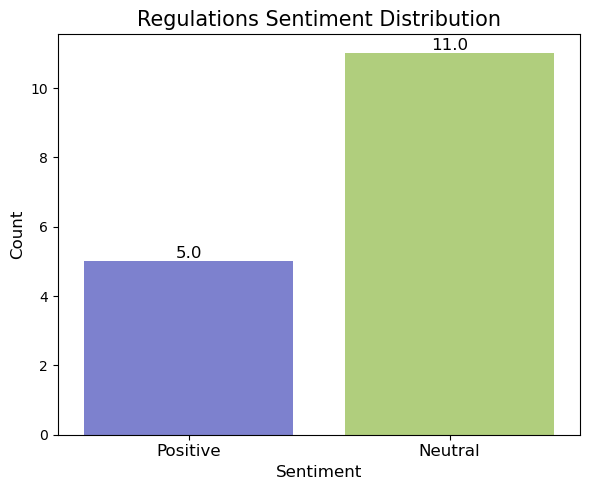

In [24]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob

# Function to classify sentiment
def classify_sentiment(polarity):
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'


# Calculate sentiment for each reason
df['market_demand_sentiment'] = df['market_demand'].apply(lambda text: TextBlob(text).sentiment.polarity)
df['cost_infrastructure_sentiment'] = df['cost_infrastructure'].apply(lambda text: TextBlob(text).sentiment.polarity)
df['company_strategy_sentiment'] = df['company_strategy'].apply(lambda text: TextBlob(text).sentiment.polarity)
df['environmental_factors_sentiment'] = df['environmental_factors'].apply(lambda text: TextBlob(text).sentiment.polarity)
df['hybrid_ev_sales_sentiment'] = df['hybrid_ev_sales'].apply(lambda text: TextBlob(text).sentiment.polarity)
df['carbon_emissions_sentiment'] = df['carbon_emissions'].apply(lambda text: TextBlob(text).sentiment.polarity)
df['mineral_usage_sentiment'] = df['mineral_usage'].apply(lambda text: TextBlob(text).sentiment.polarity)
df['regulations_sentiment'] = df['regulations'].apply(lambda text: TextBlob(text).sentiment.polarity)

# Classify sentiments
df['market_demand_sentiment_class'] = df['market_demand_sentiment'].apply(classify_sentiment)
df['cost_infrastructure_sentiment_class'] = df['cost_infrastructure_sentiment'].apply(classify_sentiment)
df['company_strategy_sentiment_class'] = df['company_strategy_sentiment'].apply(classify_sentiment)
df['environmental_factors_sentiment_class'] = df['environmental_factors_sentiment'].apply(classify_sentiment)
df['hybrid_ev_sales_sentiment_class'] = df['hybrid_ev_sales_sentiment'].apply(classify_sentiment)
df['carbon_emissions_sentiment_class'] = df['carbon_emissions_sentiment'].apply(classify_sentiment)
df['mineral_usage_sentiment_class'] = df['mineral_usage_sentiment'].apply(classify_sentiment)
df['regulations_sentiment_class'] = df['regulations_sentiment'].apply(classify_sentiment)

# Function to plot sentiment distribution using seaborn
def plot_sentiment_distribution(sentiment_classes, title):
    plt.figure(figsize=(6, 5))
    ax = sns.countplot(x=sentiment_classes, palette=['#6F75DC', '#B3DC6F', '#9E9E9E'])
    ax.set_title(title, fontsize=15)
    ax.set_xlabel('Sentiment', fontsize=12)
    ax.set_ylabel('Count', fontsize=12)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="center", fontsize=12)
    
    # Add counts above the bars
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}',
                    (p.get_x() + p.get_width() / 2, p.get_height()),
                    ha='center', va='bottom', fontsize=12, color='black')

    plt.tight_layout()
    plt.show()

# Plot sentiment distributions for each reason
plot_sentiment_distribution(df['market_demand_sentiment_class'], 'Market Demand Sentiment Distribution')
plot_sentiment_distribution(df['cost_infrastructure_sentiment_class'], 'Cost and Infrastructure Sentiment Distribution')
plot_sentiment_distribution(df['company_strategy_sentiment_class'], 'Company Strategy Sentiment Distribution')
plot_sentiment_distribution(df['environmental_factors_sentiment_class'], 'Environmental Factors Sentiment Distribution')
plot_sentiment_distribution(df['hybrid_ev_sales_sentiment_class'], 'Hybrid and EV Sales Sentiment Distribution')
plot_sentiment_distribution(df['carbon_emissions_sentiment_class'], 'Carbon Emissions Sentiment Distribution')
plot_sentiment_distribution(df['mineral_usage_sentiment_class'], 'Mineral Usage Sentiment Distribution')
plot_sentiment_distribution(df['regulations_sentiment_class'], 'Regulations Sentiment Distribution')


#### This code is useful for stakeholders to quickly grasp the sentiment trends associated with different aspects of the data, aiding decision-making processes and further analysis.

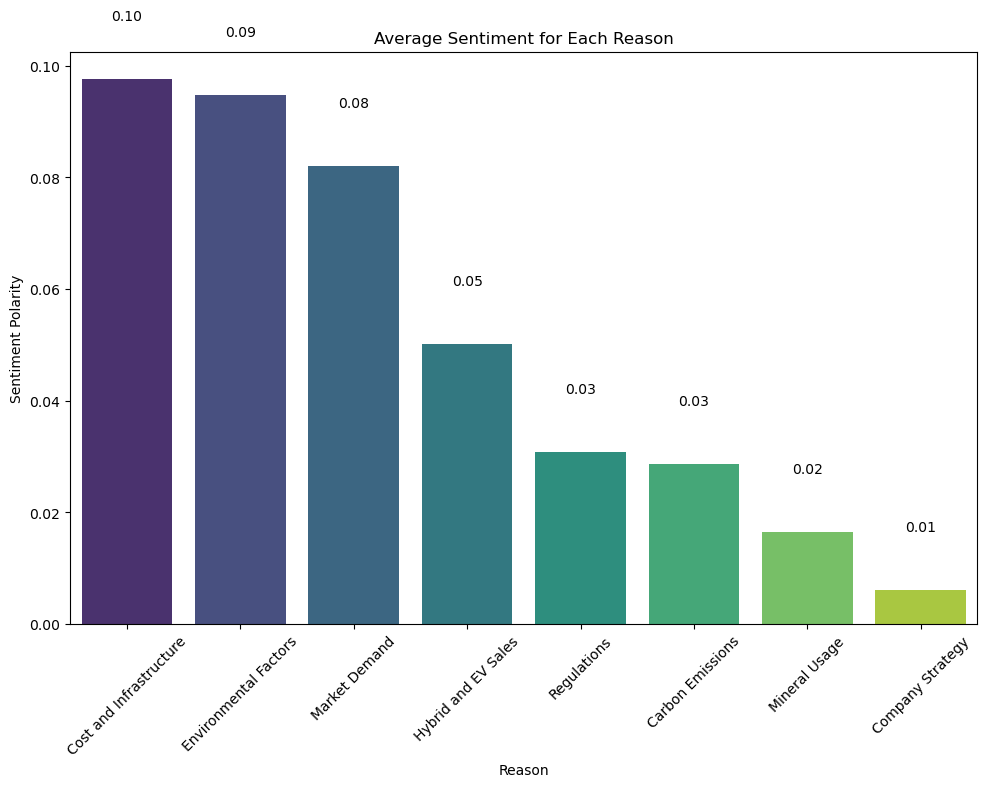

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Aggregate sentiment for each reason
sentiment_averages = {
    'Market Demand': df['market_demand_sentiment'].mean(),
    'Cost and Infrastructure': df['cost_infrastructure_sentiment'].mean(),
    'Company Strategy': df['company_strategy_sentiment'].mean(),
    'Environmental Factors': df['environmental_factors_sentiment'].mean(),
    'Hybrid and EV Sales': df['hybrid_ev_sales_sentiment'].mean(),
    'Carbon Emissions': df['carbon_emissions_sentiment'].mean(),
    'Mineral Usage': df['mineral_usage_sentiment'].mean(),
    'Regulations': df['regulations_sentiment'].mean()
}

# Convert to DataFrame for better sorting and control
sentiment_df = pd.DataFrame.from_dict(sentiment_averages, orient='index', columns=['Sentiment Polarity'])
sentiment_df = sentiment_df.sort_values(by='Sentiment Polarity', ascending=False)

# Plot the average sentiment using a vertical bar plot with seaborn
plt.figure(figsize=(10, 8))
barplot = sns.barplot(x=sentiment_df.index, y='Sentiment Polarity', data=sentiment_df, palette='viridis')

# Annotate the bars with the sentiment polarity values
for index, value in enumerate(sentiment_df['Sentiment Polarity']):
    barplot.text(index, value + 0.01, f'{value:.2f}', ha='center', va='bottom', color='black')

plt.title('Average Sentiment for Each Reason')
plt.xlabel('Reason')
plt.ylabel('Sentiment Polarity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Interactive bubble plot where each bubble represents the keyword count for a specific reason

In [28]:
import plotly.graph_objects as go
import pandas as pd

# Example keyword counts (replace these with your actual counts)
keyword_counts = {
    'Market Demand': 120,
    'Cost and Infrastructure': 85,
    'Company Strategy': 90,
    'Environmental Factors': 100,
    'Hybrid and EV Sales': 110,
    'Carbon Emissions': 80,
    'Mineral Usage': 70,
    'Regulations': 75
}

# Convert to DataFrame
keyword_df = pd.DataFrame.from_dict(keyword_counts, orient='index', columns=['Keyword Count'])

# Prepare data for bubble plot
df_heatmap = pd.DataFrame({
    'Reason': keyword_df.index,
    'Keyword Count': keyword_df['Keyword Count']
})

# Normalize keyword counts for color intensity
max_count = df_heatmap['Keyword Count'].max()
df_heatmap['Color Intensity'] = df_heatmap['Keyword Count'] / max_count

# Create the bubble scatter plot
bubble_trace = go.Scatter(
    x=df_heatmap['Reason'],
    y=df_heatmap['Keyword Count'],  # Y-coordinate for bubbles directly from keyword count
    mode='markers',
    marker=dict(
        size=df_heatmap['Keyword Count'],  # Adjusting size to a smaller scale
        color=df_heatmap['Color Intensity'],  # Color intensity based on keyword count
        colorscale='Reds',  # Color scale
        showscale=True,  # Show color scale
        line=dict(
            width=2,
            color='rgba(0, 0, 0, 1)'  # Black border for bubbles
        )
    ),
    showlegend=False
)

# Create the figure
fig = go.Figure(data=[bubble_trace])

# Update layout
fig.update_layout(
    title='Keyword Counts across Reasons (Bubble Highlights)',
    xaxis_title='Reason',
    yaxis_title='Keyword Count',
    hovermode='x',  # Show hover information only along the x-axis
    width=800,  # Setting the width to a smaller size
    height=500  # Setting the height to a smaller size
)

# Show the interactive plot with bubbles
fig.show()


C:\Users\pinis\anaconda3\Lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

C:\Users\pinis\anaconda3\Lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

